In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score,StratifiedKFold,KFold
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
from sklearn.svm import SVR
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

In [34]:
def plot_importance(model_coef,feature_cols,model_name):
    plt.figure(dpi=70)
    plt.barh(feature_cols, model_coef)
    plt.title(f'{model_name} Feature Importance')
    plt.show()

def plot_result(y_true, y_pre, num_sample=500):
    y_true = y_true[:num_sample]
    y_pre = y_pre[:num_sample]
    x = [i for i in range(len(y_true))]
    plt.figure(dpi=200)
    plt.plot(x, y_true, 'b*',label = 'Label')  
    plt.plot(x, y_pre, 'r', label = 'Pred')
    plt.legend(loc=1)
    plt.show()

1. Ccheck and clean the data 

In [3]:
df = pd.read_csv('Asian_data_ict.csv')

In [4]:
df.head()

,PV1READ,CNT,ST004D01T,ESCS,IC008Q04TA,IC008Q05TA,IC008Q08TA,UNDREM,METASUM,METASPAM,JOYREAD,SCREADCOMP,IC010Q01TA,IC010Q02NA,IC010Q05NA,IC010Q06NA,IC011Q01TA,IC011Q03TA,IC011Q09TA
0,425.688,HKG,1,-1.9067,5,5,3,.45,-.57,-.5,-0.6896,-0.8250,2,2,3,1,1,1,3
1,461.556,HKG,1,-1.9768,4,4,4,-1.64,-.57,-.96,0.3568,-0.5485,1,1,3,1,1,1,1
2,523.625,HKG,1,-2.5606,4,1,5,-.94,.59,.42,0.7973,0.1222,2,1,1,1,1,2,1
3,359.225,HKG,2,-.3868,3,4,3,-1.64,-.95,.42,-0.4389,-1.8008,2,2,1,1,1,1,1
4,607.175,HKG,2,-1.2306,4,4,4,.45,-1.72,.42,-0.1707,-0.8250,3,3,3,3,3,3,1


In [5]:
df.shape

(36490, 19)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36490 entries, 0 to 36489
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   PV1READ     36490 non-null  float64
 1   CNT         36490 non-null  object 
 2   ST004D01T   36490 non-null  int64  
 3   ESCS        36490 non-null  object 
 4   IC008Q04TA  36490 non-null  object 
 5   IC008Q05TA  36490 non-null  object 
 6   IC008Q08TA  36490 non-null  object 
 7   UNDREM      36490 non-null  object 
 8   METASUM     36490 non-null  object 
 9   METASPAM    36490 non-null  object 
 10  JOYREAD     36490 non-null  float64
 11  SCREADCOMP  36490 non-null  float64
 12  IC010Q01TA  36490 non-null  object 
 13  IC010Q02NA  36490 non-null  object 
 14  IC010Q05NA  36490 non-null  object 
 15  IC010Q06NA  36490 non-null  object 
 16  IC011Q01TA  36490 non-null  object 
 17  IC011Q03TA  36490 non-null  object 
 18  IC011Q09TA  36490 non-null  object 
dtypes: float64(3), int64(1), 

In [7]:
#Convert object to 64
df['IC008Q04TA'] = pd.to_numeric(df['IC008Q04TA'], errors='coerce').fillna(0)
df['IC008Q05TA'] = pd.to_numeric(df['IC008Q05TA'], errors='coerce').fillna(0)
df['IC008Q08TA'] = pd.to_numeric(df['IC008Q08TA'], errors='coerce').fillna(0)

df['UNDREM'] = pd.to_numeric(df['UNDREM'], errors='coerce').fillna(0)
df['METASUM'] = pd.to_numeric(df['METASUM'], errors='coerce').fillna(0)
df['METASPAM'] = pd.to_numeric(df['METASPAM'], errors='coerce').fillna(0)

df['IC010Q01TA'] = pd.to_numeric(df['IC010Q01TA'], errors='coerce').fillna(0)
df['IC010Q02NA'] = pd.to_numeric(df['IC010Q02NA'], errors='coerce').fillna(0)
df['IC010Q05NA'] = pd.to_numeric(df['IC010Q05NA'], errors='coerce').fillna(0)
df['IC010Q06NA'] = pd.to_numeric(df['IC010Q06NA'], errors='coerce').fillna(0)

df['IC011Q01TA'] = pd.to_numeric(df['IC011Q01TA'], errors='coerce').fillna(0)
df['IC011Q03TA'] = pd.to_numeric(df['IC011Q03TA'], errors='coerce').fillna(0)
df['IC011Q09TA'] = pd.to_numeric(df['IC011Q09TA'], errors='coerce').fillna(0)

df['ESCS'] = pd.to_numeric(df['ESCS'], errors='coerce').fillna(0)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36490 entries, 0 to 36489
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   PV1READ     36490 non-null  float64
 1   CNT         36490 non-null  object 
 2   ST004D01T   36490 non-null  int64  
 3   ESCS        36490 non-null  float64
 4   IC008Q04TA  36490 non-null  float64
 5   IC008Q05TA  36490 non-null  float64
 6   IC008Q08TA  36490 non-null  float64
 7   UNDREM      36490 non-null  float64
 8   METASUM     36490 non-null  float64
 9   METASPAM    36490 non-null  float64
 10  JOYREAD     36490 non-null  float64
 11  SCREADCOMP  36490 non-null  float64
 12  IC010Q01TA  36490 non-null  float64
 13  IC010Q02NA  36490 non-null  float64
 14  IC010Q05NA  36490 non-null  float64
 15  IC010Q06NA  36490 non-null  float64
 16  IC011Q01TA  36490 non-null  float64
 17  IC011Q03TA  36490 non-null  float64
 18  IC011Q09TA  36490 non-null  float64
dtypes: float64(17), int64(1),

In [9]:
df['IC010Q01TA'].unique()

array([ 2.,  1.,  3.,  4., 99.,  5.,  0., 95.])

In [10]:
#Replace the noise
df['IC008Q04TA'] = df['IC008Q04TA'].replace([99,95],0)
df['IC008Q05TA'] = df['IC008Q05TA'].replace([99,95],0)
df['IC008Q08TA'] = df['IC008Q08TA'].replace([99,95],0)

df['IC010Q01TA'] = df['IC010Q01TA'].replace([99,95],0)
df['IC010Q02NA'] = df['IC010Q02NA'].replace([99,95],0)
df['IC010Q05NA'] = df['IC010Q05NA'].replace([99,95],0)
df['IC010Q06NA'] = df['IC010Q06NA'].replace([99,95],0)

df['IC011Q01TA'] = df['IC011Q01TA'].replace([99,95],0)
df['IC011Q03TA'] = df['IC011Q03TA'].replace([99,95],0)
df['IC011Q09TA'] = df['IC011Q09TA'].replace([99,95],0)

In [11]:
df['IC010Q01TA'].unique()

array([2., 1., 3., 4., 0., 5.])

<AxesSubplot:xlabel='ST004D01T', ylabel='PV1READ'>

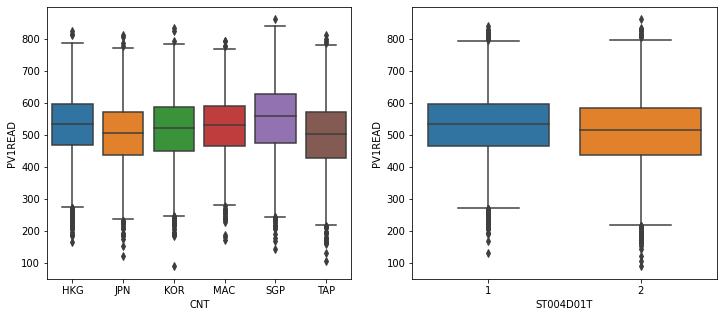

In [12]:
fig, ax_arr = plt.subplots(1,2, figsize=(12,5))
sns.boxplot(x = df['CNT'] , y = df['PV1READ'], data = df,ax = ax_arr[0])
sns.boxplot(x = df['ST004D01T'] , y = df['PV1READ'], data = df,ax = ax_arr[1])

In [13]:
coef = 3
cols = [x for x in df.columns if x not in ['ST004D01T','CNT','IC010Q01TA','IC010Q02NA','IC010Q05NA','IC010Q06NA','IC011Q01TA','IC011Q03TA','IC011Q09TA','IC008Q05TA','IC008Q04TA','IC008Q04TA']]

for col in cols:
    col_mean = df[col].mean()
    col_std = df[col].std()
    
    df[df[col]>col_std+coef*col_mean][col] = col_mean
    df[df[col]<col_std-coef*col_mean][col] = col_mean
    

In [14]:
df.describe()

,PV1READ,ST004D01T,ESCS,IC008Q04TA,IC008Q05TA,IC008Q08TA,UNDREM,METASUM,METASPAM,JOYREAD,SCREADCOMP,IC010Q01TA,IC010Q02NA,IC010Q05NA,IC010Q06NA,IC011Q01TA,IC011Q03TA,IC011Q09TA
count,36490.000000,36490.000000,36490.000000,36490.000000,36490.000000,36490.000000,36490.000000,36490.000000,36490.000000,36490.000000,36490.000000,36490.000000,36490.000000,36490.000000,36490.000000,36490.000000,36490.000000,36490.000000
mean,518.866414,1.505919,-0.177436,4.111428,3.767827,4.057194,-0.143773,-0.251651,-0.085607,1.368285,1.694026,2.506385,2.325240,2.727295,1.932584,2.017375,2.063086,1.626035
std,102.587701,0.499972,0.917019,1.405066,1.595190,1.321424,0.989415,1.032214,1.029567,10.400866,14.003918,1.184124,1.253918,1.458022,1.313190,1.516343,1.284181,1.082738
min,89.433000,1.000000,-6.759800,0.000000,0.000000,0.000000,-1.640000,-1.720000,-1.410000,-2.731600,-2.440300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,451.356000,1.000000,-0.833575,4.000000,3.000000,4.000000,-0.940000,-1.340000,-1.410000,-0.270400,-0.849000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,525.165000,2.000000,-0.111750,5.000000,5.000000,5.000000,0.000000,-0.180000,-0.040000,0.205000,-0.408900,3.000000,2.000000,3.000000,1.000000,1.000000,2.000000,1.000000
75%,591.407250,2.000000,0.524500,5.000000,5.000000,5.000000,0.450000,0.590000,0.870000,0.862800,0.122200,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,2.000000
max,860.889000,2.000000,3.959100,5.000000,5.000000,5.000000,1.500000,1.360000,1.330000,99.000000,99.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


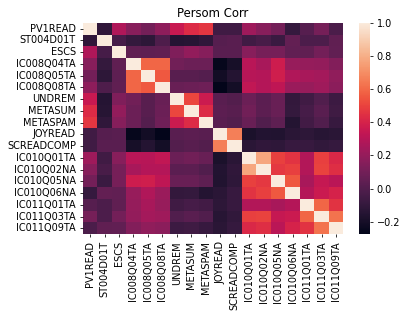

In [15]:
corr = df.corr()
plt.figure(dpi=70)
sns.heatmap(corr)
plt.title("Persom Corr")
plt.show()

In [16]:
y = df['PV1READ'].values
y = (y - np.min(y)) / (np.max(y) - np.min(y))
del df['CNT']
del df['PV1READ']

In [17]:
x_train,x_test, y_train, y_test  = train_test_split(df,y)

In [18]:
recreational = pd.DataFrame(df, columns=['IC008Q04TA','IC008Q05TA','IC008Q08TA'])
academic_outside = pd.DataFrame(df,columns = ['IC010Q01TA','IC010Q02NA','IC010Q05NA','IC010Q06NA'])
academic_inschool = pd.DataFrame(df,columns = ['IC011Q01TA','IC011Q03TA','IC011Q09TA'])
metacognitive = pd.DataFrame(df,columns = ['UNDREM','METASUM','METASPAM'])
motivation = pd.DataFrame(df, columns=['JOYREAD', 'SCREADCOMP'])

2. linear regression

In [19]:
n_fold = 5
kf = KFold(n_splits=n_fold,shuffle=True,random_state=42)
y_pre = np.zeros((df.shape[0]))
for train_index,valid_index in kf.split(df):
    
    x_train,x_valid,y_train,y_valid = df.iloc[train_index],df.iloc[valid_index],y[train_index],y[valid_index]
    
    model = LinearRegression()
    model.fit(x_train,y_train)
    
    y_pre[valid_index] = model.predict(x_valid).reshape(-1)
    
print("MAE:{}". format(mean_absolute_error(y,y_pre)))
print("MSE:{}". format(mean_squared_error(y,y_pre)))
print("RMSE:{}". format(np.sqrt(mean_squared_error(y,y_pre))))
print("R2:{}". format(r2_score(y,y_pre)))

MAE:0.08383016276899144
MSE:0.011156984934705747
RMSE:0.10562662985585475
R2:0.3690564973831423


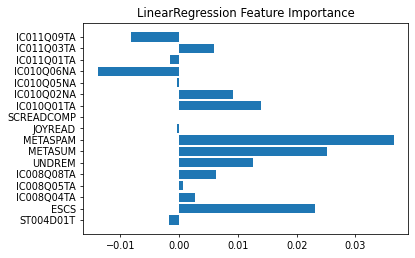

In [20]:
plot_importance(model.coef_,df.columns,'LinearRegression')

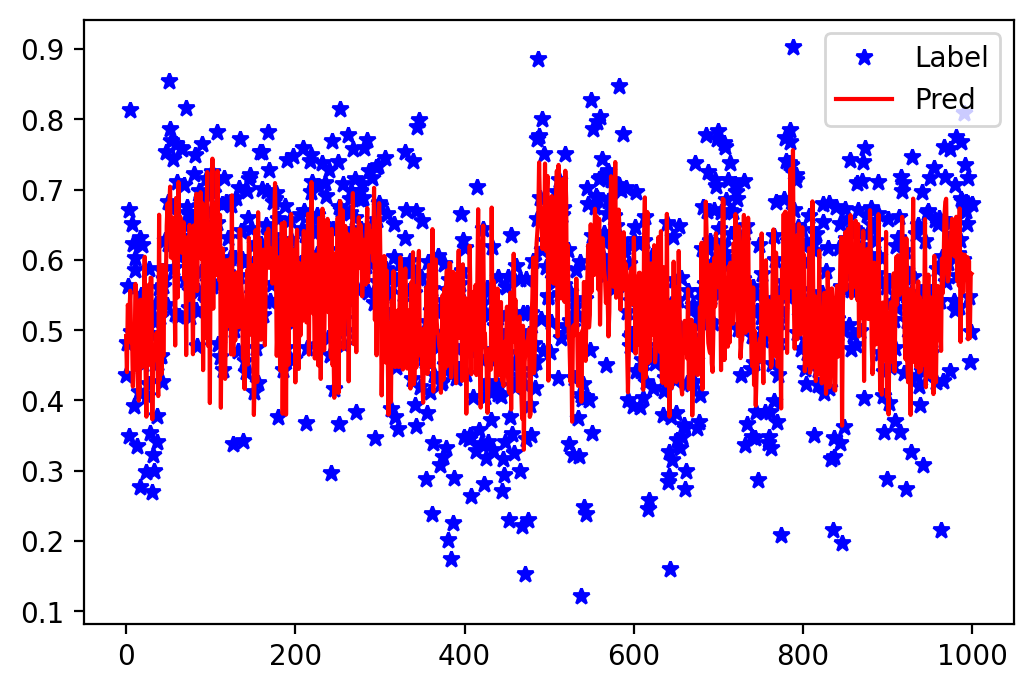

In [38]:
plot_result(y[:1000],y_pre[:1000])

In [35]:
# apply lasso
param_grid = [
    {'alpha': [0.001,0.01,0.1,0.3,0.6,0.9],'max_iter':[100,500,1000]},
]
 
model = Lasso()
grid_search = GridSearchCV(model, param_grid, cv=5,
                          scoring='neg_median_absolute_error')
 
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid=[{'alpha': [0.001, 0.01, 0.1, 0.3, 0.6, 0.9],
                          'max_iter': [100, 500, 1000]}],
             scoring='neg_median_absolute_error')

In [36]:
best_param = grid_search.best_params_
print(f'Lasso Best Param: {best_param}')

Lasso Best Param: {'alpha': 0.001, 'max_iter': 100}


In [37]:
n_fold = 5
kf = KFold(n_splits=n_fold,shuffle=True,random_state=42)
y_pre = np.zeros((df.shape[0]))
for train_index,valid_index in kf.split(df):
    
    x_train,x_valid,y_train,y_valid = df.iloc[train_index],df.iloc[valid_index],y[train_index],y[valid_index]
    
    model = Lasso(**best_param)
    model.fit(x_train,y_train)
    
    y_pre[valid_index] = model.predict(x_valid).reshape(-1)
    
print("MAE:{}". format(mean_absolute_error(y,y_pre)))
print("MSE:{}". format(mean_squared_error(y,y_pre)))
print("RMSE:{}". format(np.sqrt(mean_squared_error(y,y_pre))))
print("R2:{}". format(r2_score(y,y_pre)))

MAE:0.08384598101511373
MSE:0.01116599619255964
RMSE:0.10566927742991167
R2:0.36854689782496486


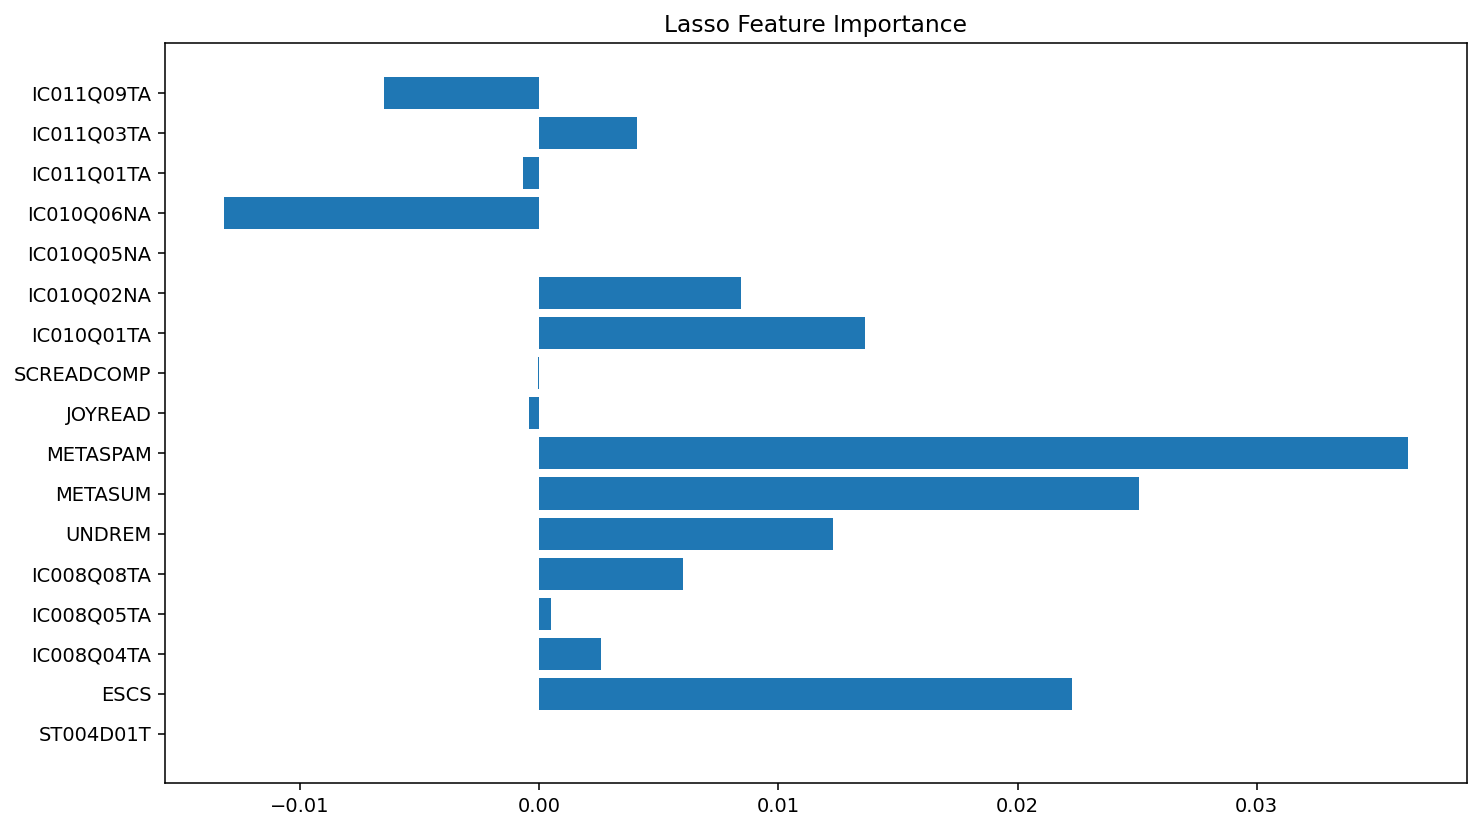

In [171]:
plot_importance(model.coef_, df.columns, 'Lasso')

In [172]:
# apply ridge
param_grid = [
    {'alpha': [0.1,0.3,0.9],'max_iter':[100,500,1000]},
]
 
model = Ridge()
grid_search = GridSearchCV(model, param_grid, cv=5,
                          scoring='neg_median_absolute_error')
 
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid=[{'alpha': [0.1, 0.3, 0.9],
                          'max_iter': [100, 500, 1000]}],
             scoring='neg_median_absolute_error')

In [173]:
best_param = grid_search.best_params_
print(f'Ridge Best Param: {best_param}')

Ridge Best Param: {'alpha': 0.9, 'max_iter': 100}


In [174]:
n_fold = 5
kf = KFold(n_splits=n_fold,shuffle=True,random_state=42)
y_pre = np.zeros((df.shape[0]))
for train_index,valid_index in kf.split(df):
    
    x_train,x_valid,y_train,y_valid = df.iloc[train_index],df.iloc[valid_index],y[train_index],y[valid_index]
    
    model = Ridge(**best_param)
    model.fit(x_train,y_train)
    
    y_pre[valid_index] = model.predict(x_valid).reshape(-1)
    
print("MAE:{}". format(mean_absolute_error(y,y_pre)))
print("MSE:{}". format(mean_squared_error(y,y_pre)))
print("RMSE:{}". format(np.sqrt(mean_squared_error(y,y_pre))))
print("R2:{}". format(r2_score(y,y_pre)))

MAE:0.0838301702211445
MSE:0.011156984464313053
RMSE:0.10562662762917811
R2:0.36905652398452393


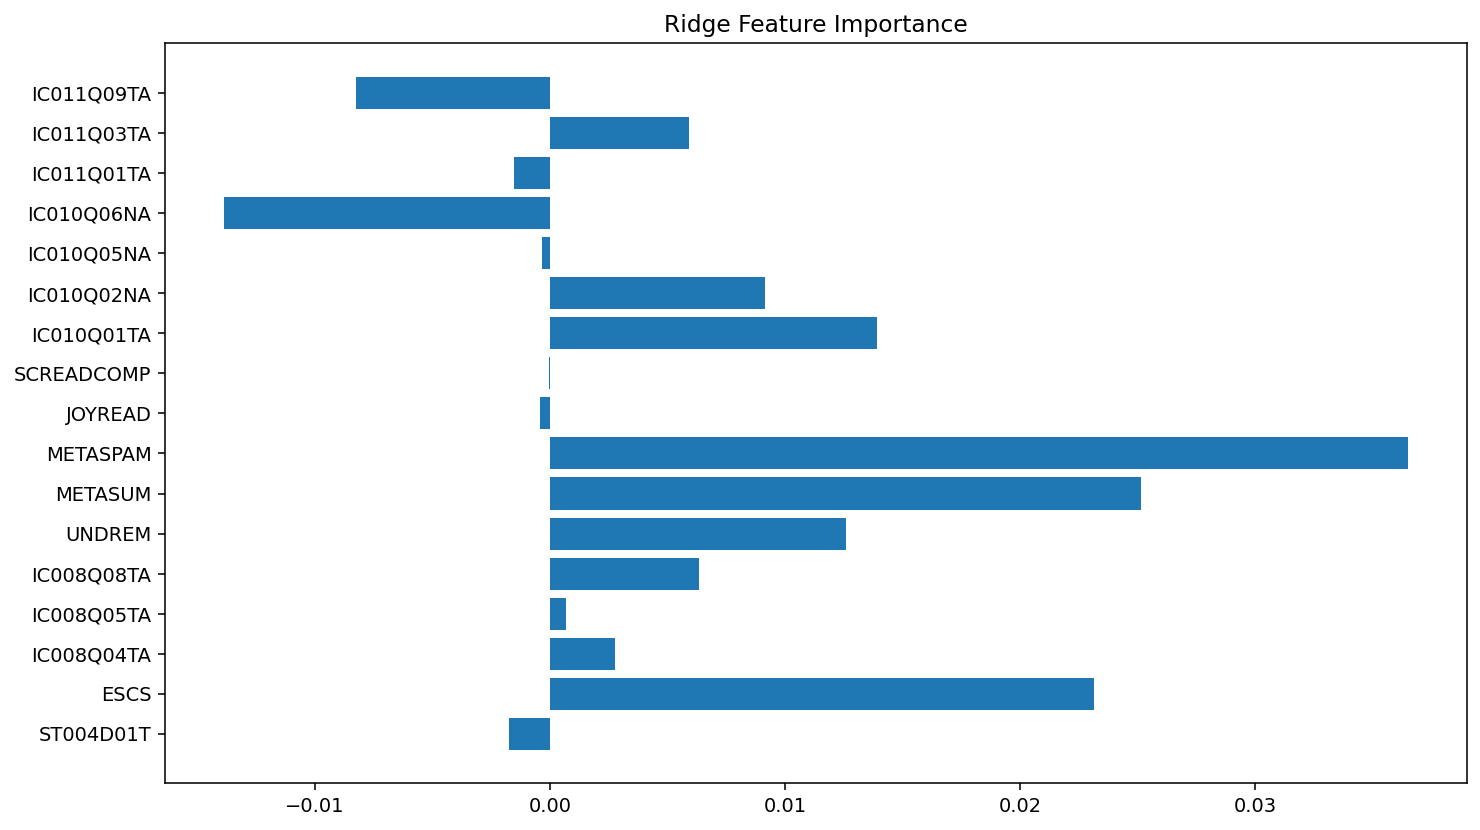

In [175]:
plot_importance(model.coef_, df.columns, 'Ridge')

In [43]:
param_grid = [
    {'gamma':[0.01,0.1,1,10],'C':[0.01,0.1,1,10]},
]
 
model = SVR()
grid_search = GridSearchCV(model, param_grid, cv=5,
                          scoring='neg_median_absolute_error')
 
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid=[{'C': [0.01, 0.1, 1, 10],
                          'gamma': [0.01, 0.1, 1, 10]}],
             scoring='neg_median_absolute_error')

In [44]:
best_param = grid_search.best_params_
print(f'SVR Best Param: {best_param}')

SVR Best Param: {'C': 0.1, 'gamma': 0.01}


In [46]:
n_fold = 5
kf = KFold(n_splits=n_fold,shuffle=True,random_state=42)
y_pre = np.zeros((df.shape[0]))
for train_index,valid_index in kf.split(df):
    
    x_train,x_valid,y_train,y_valid = df.iloc[train_index],df.iloc[valid_index],y[train_index],y[valid_index]
    
    model = SVR(**best_param)
    model.fit(x_train,y_train)
    
    y_pre[valid_index] = model.predict(x_valid).reshape(-1)
    
print("MAE:{}". format(mean_absolute_error(y,y_pre)))
print("MSE:{}". format(mean_squared_error(y,y_pre)))
print("RMSE:{}". format(np.sqrt(mean_squared_error(y,y_pre))))
print("R2:{}". format(r2_score(y,y_pre)))

MAE:0.07888077393584873
MSE:0.009933808027188481
RMSE:0.09966849064367575
R2:0.4382289061356468


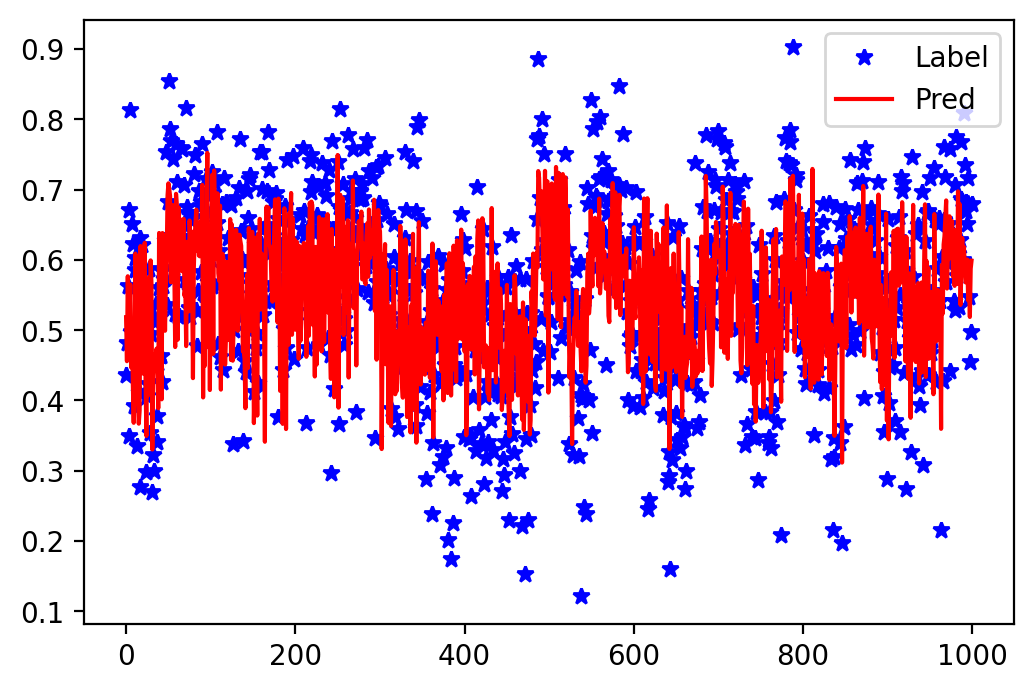

In [47]:
plot_result(y[:1000],y_pre[:1000])

# Nested CV

In [35]:
def nested_cv(X,y,model_name,param_grid, n_fold = 5):
    n_fold = 5
    kf = KFold(n_splits=n_fold,shuffle=True,random_state=42)
    y_pre = np.zeros((X.shape[0]))
    for idx,(train_index,valid_index) in enumerate(kf.split(X)):
        
        x_train,x_valid,y_train,y_valid = X[train_index],X[valid_index],y[train_index],y[valid_index]
        
        model = eval(f'{model_name}()')
        grid_search = GridSearchCV(model, param_grid, cv=n_fold,
                          scoring='neg_median_absolute_error')
 
        grid_search.fit(x_train, y_train)
        best_param = grid_search.best_params_
        print(f'{model_name} Fold {idx+1} Best Param: {best_param}')

        model = eval(f'{model_name}(**best_param)')
        model.fit(x_train,y_train)

        y_pre[valid_index] = model.predict(x_valid).reshape(-1)
    
    print('Nested CV Result:')
    print("MAE:{}". format(mean_absolute_error(y,y_pre)))
    print("MSE:{}". format(mean_squared_error(y,y_pre)))
    print("RMSE:{}". format(np.sqrt(mean_squared_error(y,y_pre))))
    print("R2:{}". format(r2_score(y,y_pre)))
    plot_result(y,y_pre,num_sample=500)

Lasso Fold 1 Best Param: {'alpha': 0.001, 'max_iter': 100}
Lasso Fold 2 Best Param: {'alpha': 0.001, 'max_iter': 100}
Lasso Fold 3 Best Param: {'alpha': 0.001, 'max_iter': 100}
Lasso Fold 4 Best Param: {'alpha': 0.001, 'max_iter': 100}
Lasso Fold 5 Best Param: {'alpha': 0.001, 'max_iter': 100}
Nested CV Result:
MAE:0.08384598101511373
MSE:0.011165996192559638
RMSE:0.10566927742991165
R2:0.36854689782496497


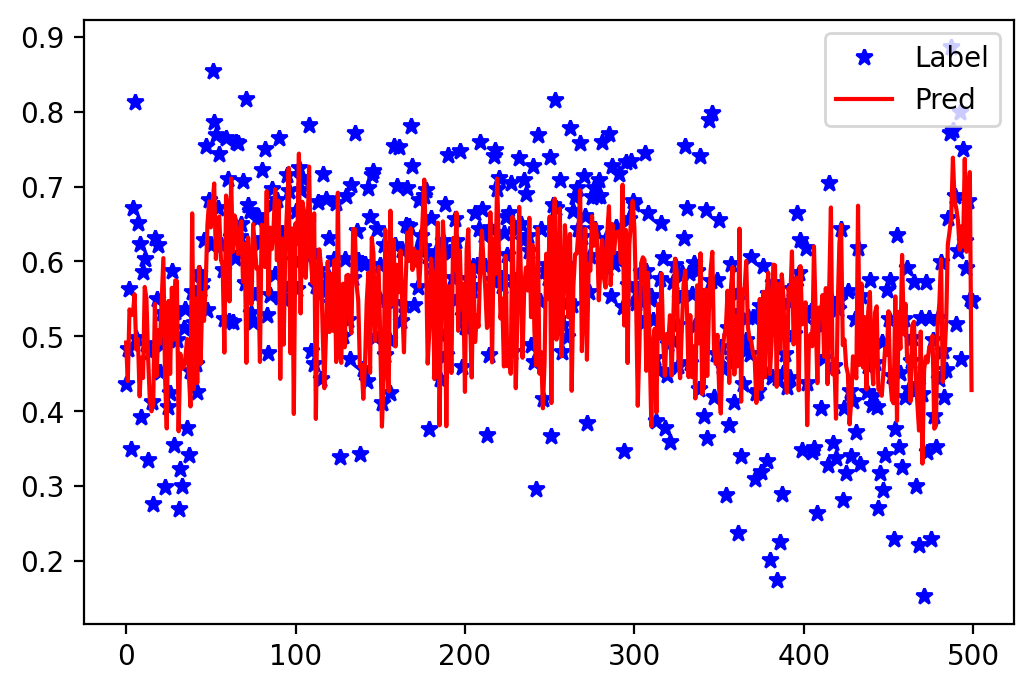

In [36]:
#Lasso
param_grid = [
    {'alpha': [0.001,0.01,0.1,0.3,0.6,0.9],'max_iter':[100,500,1000]},
]
nested_cv(df.values,y,'Lasso',param_grid)

Ridge Fold 1 Best Param: {'alpha': 0.9, 'max_iter': 100}
Ridge Fold 2 Best Param: {'alpha': 0.1, 'max_iter': 100}
Ridge Fold 3 Best Param: {'alpha': 0.1, 'max_iter': 100}
Ridge Fold 4 Best Param: {'alpha': 0.1, 'max_iter': 100}
Ridge Fold 5 Best Param: {'alpha': 0.9, 'max_iter': 100}
Nested CV Result:
MAE:0.08383016701405904
MSE:0.011156983920415675
RMSE:0.10562662505455561
R2:0.36905655474270094


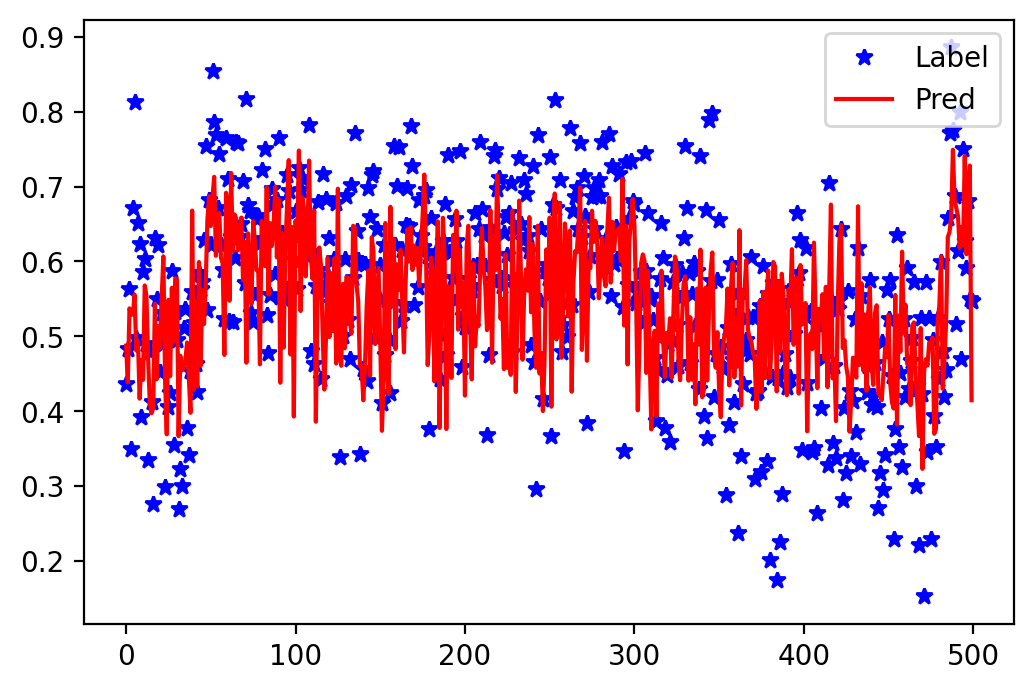

In [37]:
#Lasso
param_grid = [
    {'alpha': [0.1,0.3,0.9],'max_iter':[100,500,1000]},
]
nested_cv(df.values,y,'Ridge',param_grid)

In [0]:
#SVR
param_grid = [
    {'gamma':[0.01,0.1,1,10],'C':[0.01,0.1,1,10]},
]
nested_cv(df.values,y,'SVR',param_grid)